<a href="https://colab.research.google.com/github/GabrielaRomoM/TAM-2025-2/blob/main/Tareas/TAM_040925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [2]:
# import shutil
# shutil.rmtree('/content/TAM-2025-2')

# Carga de Imágenes

In [3]:
!git clone https://github.com/GabrielaRomoM/TAM-2025-2.git

Cloning into 'TAM-2025-2'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 148 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (148/148), 1.84 MiB | 12.03 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [4]:
# Función para cargar y redimensionar (al mismo tamaño para todas las imágenes)
def load_and_resize(path, size=(200,200)):
    img = Image.open(path).resize(size)
    return np.array(img)

# Cargar imágenes redimensionadas
face1 = load_and_resize('/content/TAM-2025-2/Tareas/Images/face1.jpg')
face2 = load_and_resize('/content/TAM-2025-2/Tareas/Images/face2.jpg')
face3 = load_and_resize('/content/TAM-2025-2/Tareas/Images/face3.jpg')

# Parte 1: Proyección Lineal de Vectores

## Solución Analítica y Solución Iterativa

Para la proyección lineal de un vector $X_n$ sobre otro vector $X_m$ se tiene en cuenta lo siguiente:
<p align="center">
<b>MODELO →</b> $\hat{X} = \alpha X_m$
</p>

**COSTO (LOSS):** La proyección busca minimizar la diferencia entre el vector original y su aproximación lineal.

$$J(\alpha) = \| X_n - \hat{X} \|_2^2 = \| X_n - \alpha X_m \|_2^2$$

que de igual forma puede ser expresado por:

$$\| X_n - \alpha X_m \|_2^2 = \langle X_n, X_n \rangle - 2\alpha \langle X_n, X_m \rangle + \alpha^2\langle X_m, X_m \rangle$$

<p align="center">
<b>OPTIMIZACIÓN Y ENTRENAMIENTO</b>
</p>

**1. Solución Analítica (Mínimos Cuadrados)**

A partir del producto punto y la norma del vector base, el escalar óptimo es:
$\alpha^\ast = \frac{\langle X_n, X_m \rangle}{\| X_m \|^2}$

**2. Solución Iterativa (Descenso por Gradiente)**

Definiendo un learning rate (taza de aprendizaje) →  $\eta$, el valor de $\alpha$ se actualiza iterativamente mediante:

$$\alpha_{t} = \alpha_{t-1} - \eta \, \frac{\partial J(\alpha)}{\partial \alpha_{t-1}}$$

donde el gradiente se expresa como:
$\frac{\partial J(\alpha)}{\partial \alpha} = -2 \left( \langle X_n, X_m \rangle - \alpha \langle X_m, X_m \rangle \right)$

Este procedimiento ajusta progresivamente $\alpha$ hasta aproximarse al valor óptimo.

In [5]:
# 1. DEFINICIÓN DE VECTORES
# Se busca proyectar el vector y (Xn) sobre la dirección definida por a (Xm)
y = np.array([4, 0])
a = np.array([5, 2])      # Nota: a no puede ser (0,0)


# 2. SOLUCIÓN ANALÍTICA (Mínimos Cuadrados)

num = np.dot(y,a)  # <Xn,Xm>
den = np.dot(a,a) # ||Xm||
alpha_a = num/den # Escalar analítico
xproj_a = alpha_a * a # Proyección analítica

# 3. SOLUCIÓN ITERATIVA (Descenso por Gradiente)

alpha_i = 0.0
hist_alpha = [alpha_i]

n = 0.01 # Tasa de aprendizaje
tol = 1e-6 # Valor de Tolerancia
iter = 50 # Número de Iteraciones

for i in range(iter):
  grad = -2*(np.dot(y,a)- alpha_i*np.dot(a,a)) # Gradiente
  alpha_n = alpha_i - n * grad
  if np.abs(alpha_n - alpha_i) < tol:
    break
  alpha_i = alpha_n
  hist_alpha.append(alpha_i)

xproj_i = alpha_i * a      # Proyección iterativa


# 4. FUNCIÓN DE COSTO (loss)
# Función de costo
def cost_function(alpha,y,a):
  return np.dot(y, y) - 2*alpha*np.dot(y, a) + alpha**2*np.dot(a, a)

# 5. RESULTADOS

# Se imprimen los resultados de ambas soluciones.
print("\n=== DATOS ===")
print(f"y (Xn)            = {y}")
print(f"a (Xm)            = {a}")
print("\n=== SOLUCIÓN ANALÍTICA  ===")
print(f"x*/α (analítico)  = {alpha_a:.5f}")

print("\n=== SOLUCIÓN ITERATIVA ===")
print(f"iteraciones realizadas = {len(hist_alpha)}")
print(f"LR utilizado           = {n}")
print(f"x*/α (iterativo)       = {alpha_i:.5f}\n")


=== DATOS ===
y (Xn)            = [4 0]
a (Xm)            = [5 2]

=== SOLUCIÓN ANALÍTICA  ===
x*/α (analítico)  = 0.68966

=== SOLUCIÓN ITERATIVA ===
iteraciones realizadas = 16
LR utilizado           = 0.01
x*/α (iterativo)       = 0.68965



## Gráfica Proyección Líneal de Vectores en 2D

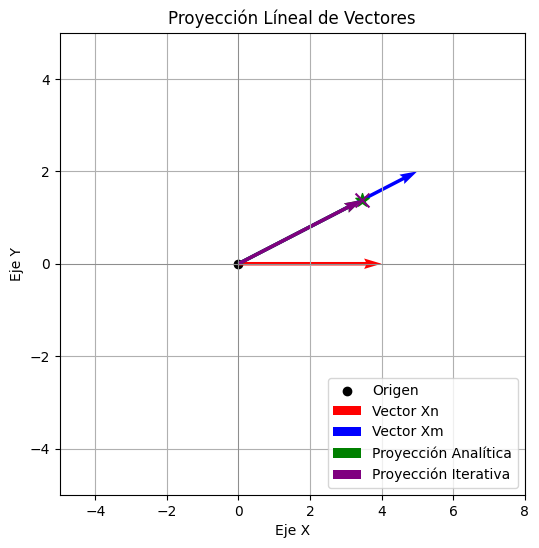

In [6]:
# 6. VISUALIZACIÓN GEOMÉTRICA EN 2D
'''
Se muestran: Vector original y (Xn), Vector base a (Xm),
Proyección analítica, Proyección iterativa y Recta que define el subespacio generado por a
'''

plt.figure(figsize=(6,6))
plt.scatter(0, 0, c="black", label="Origen") #Origen
plt.quiver(0, 0, y[0], y[1], angles="xy", scale_units="xy", scale=1, color="red", label="Vector Xn") # Vector Xn (a proyectar)
plt.quiver(0, 0, a[0], a[1], angles="xy", scale_units="xy", scale=1, color="blue", label="Vector Xm") # Vector Xm (dirección de la recta)
# Proyección analítica
plt.quiver(0, 0, xproj_a[0], xproj_a[1], angles="xy", scale_units="xy",
           scale=1, color="green", label="Proyección Analítica")
plt.scatter(xproj_a[0], xproj_a[1], c="green", marker="*", s=100)
# Proyección iterativa
plt.quiver(0, 0, xproj_i[0], xproj_i[1], angles="xy",
           scale_units="xy", scale=1, color="purple", label="Proyección Iterativa")
plt.scatter(xproj_i[0], xproj_i[1], c="purple", marker="x", s=100)

# Configuración del plano
plt.axhline(0, color="gray", linewidth=0.5) ; plt.axvline(0, color="gray", linewidth=0.5)
plt.xlim(-5, 8); plt.ylim(-5, 5)
plt.xlabel("Eje X"); plt.ylabel("Eje Y")
plt.title("Proyección Líneal de Vectores")
plt.legend(loc= "lower right"); plt.grid(True); plt.show()

## Gráfica de Función de Costo (Loss)

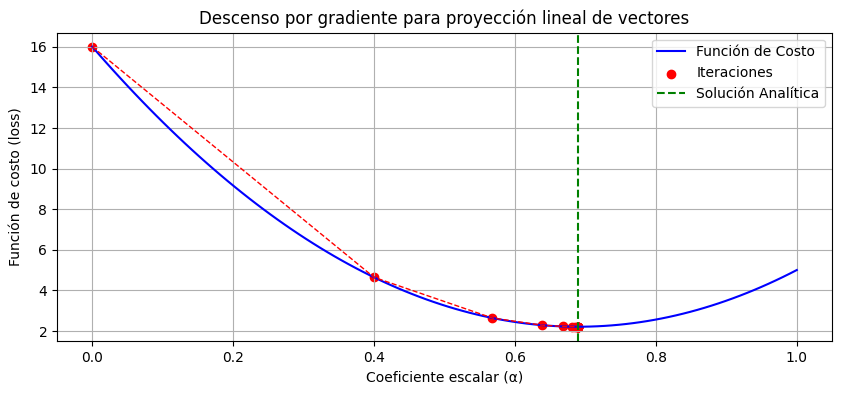

In [7]:
# 7. VISUALIZACIÓN FUNCIÓN DE COSTO
# Generar un rango de valores escalares "alpha" para gráficar la función de costo
alpha_values = np.linspace(0,1,100)
cost_values = [cost_function(alpha, y, a) for alpha in alpha_values]

# Graficar función de costo
plt.figure(figsize=(10, 4))
plt.plot(alpha_values, cost_values, label='Función de Costo', color='blue')

# Graficar Descenso por Gradiente
plt.scatter(hist_alpha, [cost_function(alpha,y,a) for alpha in hist_alpha], color='red', label='Iteraciones')
plt.plot(hist_alpha, [cost_function(alpha,y,a) for alpha in hist_alpha], color='red', linestyle='--', linewidth=1)

# # Mostrar la solución analítica
plt.axvline(alpha_a, color='green', linestyle='--', label='Solución Analítica')

# Otros parámetros
plt.xlabel('Coeficiente escalar (α)')
plt.ylabel('Función de costo (loss)')
plt.title('Descenso por gradiente para proyección lineal de vectores')
plt.legend(); plt.grid(True); plt.show()

# Parte 2: Proyección Lineal con Imágenes

## Solución Analítica e Iterativa


=== DATOS ===


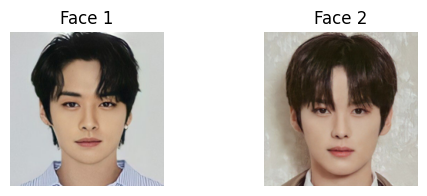


=== SOLUCIÓN ANALÍTICA  ===
x*/α (analítico)  = 0.31980

=== SOLUCIÓN ITERATIVA ===
iteraciones realizadas = 25
LR utilizado           = 0.001
x*/α (iterativo)       = 0.31980



In [8]:
# 1. DEFINICIÓN DE VECTORES
# Se busca proyectar el vector vec1 (Xn) sobre la dirección definida por vec2 (Xm)
vec1 = face1.flatten()
vec2 = face2.flatten()

# 2. SOLUCIÓN ANALÍTICA (Mínimos Cuadrados)

num = np.dot(vec1,vec2)  # <Xn,Xm>
den = np.dot(vec2,vec2) # ||Xm||
alpha_a = num/den # Escalar analítico
xproj_a = alpha_a * vec2 # Proyección analítica

# 3. SOLUCIÓN ITERATIVA (Descenso por Gradiente)

alpha_i = 0.0
hist_alpha = [alpha_i]

n = 1e-3 # Tasa de aprendizaje
tol = 1e-6 # Valor de Tolerancia
iter = 50 # Número de Iteraciones

for i in range(iter):
  grad = -2*(np.dot(vec1,vec2)- alpha_i*np.dot(vec2,vec2)) # Gradiente
  alpha_n = alpha_i - n * grad
  if np.abs(alpha_n - alpha_i) < tol:
    break
  alpha_i = alpha_n
  hist_alpha.append(alpha_i)

xproj_i = alpha_i * vec2     # Proyección iterativa

# 4. FUNCIÓN DE COSTO (loss)
# Función de costo
def cost_function(alpha,y,a):
  return np.dot(vec1, vec1) - 2*alpha*np.dot(vec1, vec2) + alpha**2*np.dot(vec1, vec1)

# 5. RESULTADOS

# Se imprimen los resultados de ambas soluciones.
print("\n=== DATOS ===")
fig, axes = plt.subplots(1,2, figsize=(6, 2))
axes[0].imshow(face1); axes[0].set_title("Face 1")
axes[1].imshow(face2); axes[1].set_title("Face 2")
for ax in axes:
    ax.axis("off")
plt.show()

print("\n=== SOLUCIÓN ANALÍTICA  ===")
print(f"x*/α (analítico)  = {alpha_a:.5f}")

print("\n=== SOLUCIÓN ITERATIVA ===")
print(f"iteraciones realizadas = {len(hist_alpha)}")
print(f"LR utilizado           = {n}")
print(f"x*/α (iterativo)       = {alpha_i:.5f}\n")

## Visualización función de costo (loss)

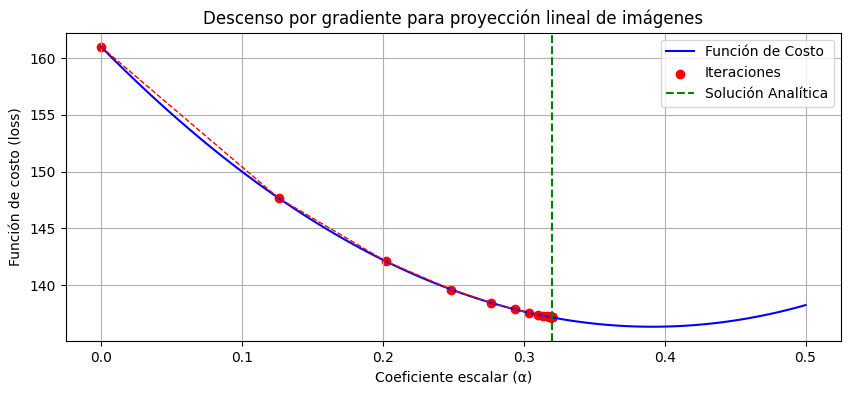

In [9]:
# 6. VISUALIZACIÓN DE LA FUNCIÓN DE COSTO (loss)
# Generar un rango de valores escalares "alpha" para gráficar la función de costo
alpha_values = np.linspace(0,0.5,100)
cost_values = [cost_function(alpha, vec1, vec2) for alpha in alpha_values]

# Graficar función de costo
plt.figure(figsize=(10, 4))
plt.plot(alpha_values, cost_values, label='Función de Costo', color='blue')

# Graficar Descenso por Gradiente
plt.scatter(hist_alpha, [cost_function(alpha,vec1,vec2) for alpha in hist_alpha], color='red', label='Iteraciones')
plt.plot(hist_alpha, [cost_function(alpha,vec1,vec2) for alpha in hist_alpha], color='red', linestyle='--', linewidth=1)

# # Mostrar la solución analítica
plt.axvline(alpha_a, color='green', linestyle='--', label='Solución Analítica')

# Otros parámetros
plt.xlabel('Coeficiente escalar (α)')
plt.ylabel('Función de costo (loss)')
plt.title('Descenso por gradiente para proyección lineal de imágenes')
plt.legend(); plt.grid(True); plt.show()